# Аналіз якості роботи нейронної мережі для розпізнання одягу  в Keras


In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Підготовка даних

**Завантажуємо набір даних**

In [2]:
# У Keras вбудовані засоби роботи з популярними наборами данных
# (x_train, y_train) - набір даних для навчання
# (x_test, y_test) - набір даних для тестування
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список з назвами класів

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Переглянемо підготовлені зображення

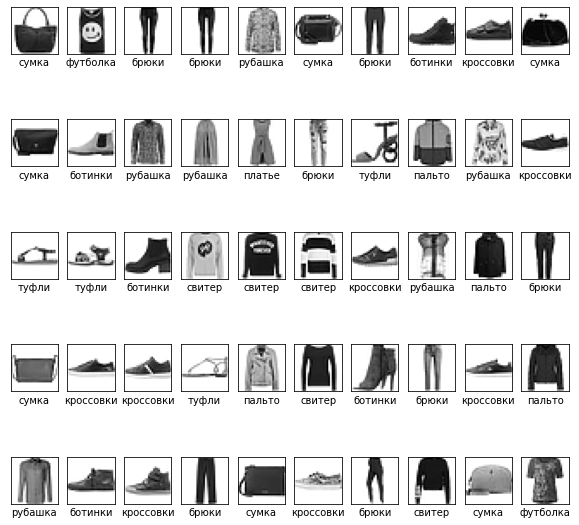

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Зміна розміру зображень, нормалізація даних**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
x_train = x_train / 255 
x_test = x_test / 255 

**Перетворення поміток у one hot encoding**

In [7]:
y_train = utils.to_categorical(y_train, 10)

In [8]:
y_test = utils.to_categorical(y_test, 10)

## Створюємо нейронну мережу, навчаємо, оцінюємо




In [9]:
results = []
callbacks = []

for input_n in [400, 600, 800, 1200]:
  print("Neurons in input layer: ", input_n)

  # keras.clear_session()
  model = Sequential()
  model.add(Dense(input_n, input_dim=784, activation="relu"))
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

  print(model.summary())

  history = model.fit(x_train, y_train, 
                    batch_size=10, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)
  scores = model.evaluate(x_test, y_test, verbose=1)
  print("Правильні відповіді на тестових даних: {} %".format(round(scores[1] * 100, 4)))

4800/4800 [==============================] - 17s 3ms/step - loss: 0.5941 - accuracy: 0.8009 - val_loss: 0.5015 - val_accuracy: 0.8187
Epoch 2/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.4401 - accuracy: 0.8474 - val_loss: 0.4470 - val_accuracy: 0.8394
Epoch 3/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.4011 - accuracy: 0.8603 - val_loss: 0.3865 - val_accuracy: 0.8667
Epoch 4/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.3734 - accuracy: 0.8677 - val_loss: 0.3852 - val_accuracy: 0.8644
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.3550 - accuracy: 0.8745 - val_loss: 0.3602 - val_accuracy: 0.8736
Epoch 6/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.3380 - accuracy: 0.8804 - val_loss: 0.3635 - val_accuracy: 0.8698
Epoch 7/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.3265 - accuracy: 0.8847 - val_loss: 0.3660 - val_accuracy: 0.8

Бачимо, що немає сенсу використовувати більше 400 нейронів у вхідному шарі, відсоток вірних відповідей на тестових даних незмінний: ~87%

У таких випадках, серед "оптимальних" значень гіперпараметра краще обрати мінімальне, щоб запобігти overfitting.

In [10]:
results = []

for hidden_n in [200, 300, 400, 600, 800]:
  print("Neurons in hidden layer: ", hidden_n)

  # keras.clear_session()
  model = Sequential()
  model.add(Dense(400, input_dim=784, activation="relu"))
  model.add(Dense(hidden_n, activation="relu"))
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

  print(model.summary())

  history = model.fit(x_train, y_train, 
                    batch_size=10, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)
  scores = model.evaluate(x_test, y_test, verbose=1)
  print("Правильні відповіді на тестових даних: {} %".format(round(scores[1] * 100, 4)))

Neurons in hidden layer:  200
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 400)               314000    
                                                                 
 dense_9 (Dense)             (None, 200)               80200     
                                                                 
 dense_10 (Dense)            (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.5877 - accuracy: 0.7989 - val_loss: 0.4643 - val_accuracy: 0.8346
Epoch 2/10
4800/4800 [==============================] - 17s 4ms/step - loss: 0.4227 - accuracy: 0.8513 - val_loss: 0.4286 - val_accu

Аналогічно, зміна кількості нейронів у скритому шарі не призвела до помітного покращення точності, при цьому зростає час навчання та вірогідність overfitting. Залишимо 200 нейронов.

В загальному випадку, на якість нейромережі більше впливає саме кількість шарів, ніж кількість нейронів у них.

In [12]:
scores3 = []

for layers_count in [2, 3, 4]:
  for layer_neuron_multiplier in [100, 200]:

    model = Sequential()
    model.add(Dense(400, input_dim=784, activation="relu"))

    for i in range(layers_count):
      hidden_n = (layers_count - i) * layer_neuron_multiplier
      print("Add hidden layer {} with {} neurons".format(i, hidden_n))
      model.add(Dense(hidden_n, activation="relu"))

    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

    print(model.summary())

    history = model.fit(x_train, y_train, 
                    batch_size=10, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)
    scores = model.evaluate(x_test, y_test, verbose=1)
    print("Правильні відповіді на тестових даних: {} %".format(round(scores[1] * 100, 4)))
    scores3.append(scores)

Add hidden layer 0 with 200 neurons
Add hidden layer 1 with 100 neurons
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 400)               314000    
                                                                 
 dense_48 (Dense)            (None, 200)               80200     
                                                                 
 dense_49 (Dense)            (None, 100)               20100     
                                                                 
 dense_50 (Dense)            (None, 10)                1010      
                                                                 
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.5840 - accuracy: 0.7960

Аналогічно, відсоток вірних відповідей не сильно покращується при наявності більше 2 прихованих шарів. Можливо, це пов'язано з недостатньою кількістю епох навчання (було обрано параметр 10 для пришвидшення роботи). Також ймовірно, що кількість нейронів у початковому шарі слугує bottleneck-ом у деяких випадках.

Також бачимо, що для 4 прихованих шарів збільшується точність на тренувальних даних, але не збільшується точність на тестових даних, що може свідчити про overfitting.

Найкращий результат отримали з двома прихованими шарами зі 200 та 100 нейронами відповідно. Оберемо такі значення для наступного завдання.

In [13]:
scores4 = []

for epochs in [10, 15, 20, 25, 30]:
  # keras.clear_session()
  model = Sequential()
  model.add(Dense(400, input_dim=784, activation="relu"))
  model.add(Dense(200, activation="relu"))
  model.add(Dense(100, activation="relu"))
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

  print(model.summary())

  history = model.fit(x_train, y_train, 
                    batch_size=10, 
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)
  scores = model.evaluate(x_test, y_test, verbose=1)
  print("Правильні відповіді на тестових даних: {} %".format(round(scores[1] * 100, 4)))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 400)               314000    
                                                                 
 dense_78 (Dense)            (None, 200)               80200     
                                                                 
 dense_79 (Dense)            (None, 100)               20100     
                                                                 
 dense_80 (Dense)            (None, 10)                1010      
                                                                 
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.5887 - accuracy: 0.7918 - val_loss: 0.4530 - val_accuracy: 0.8393
Epoch 2/10
4800/4800 [=======

Дійсно, 10 епох могло бути недостатньо. Найвищу точність на тестових даних (89.4%) отримали після 30 епох навчання.

In [15]:
scores5 = []

for batch_size in [10, 50, 100, 200, 500]:
  print("Batch size: ", batch_size)
  
  model = Sequential()
  model.add(Dense(400, input_dim=784, activation="relu"))
  model.add(Dense(200, activation="relu"))
  model.add(Dense(100, activation="relu"))
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

  print(model.summary())

  history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=1)
  scores = model.evaluate(x_test, y_test, verbose=1)
  print("Правильні відповіді на тестових даних: {} %".format(round(scores[1] * 100, 4)))
  scores5.append(scores)

Batch size:  10
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 400)               314000    
                                                                 
 dense_103 (Dense)           (None, 200)               80200     
                                                                 
 dense_104 (Dense)           (None, 100)               20100     
                                                                 
 dense_105 (Dense)           (None, 10)                1010      
                                                                 
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
4800/4800 [==============================] - 21s 4ms/step - loss: 0.5794 - accuracy: 0.7966 - val_loss: 0.4793 - val_accuracy: 0.8258
Epoch 2/30
48

Бачимо, що значно знижується час навчання, але і падає відсоток правильних відповідей. Це пов'язано з тим, що нейромережа проходить менше кроків навчання. Найбільшу кількість вірних відповідей маємо при розмірі batch: 10.
## Підсумки
На тестовомому наборі даних серед усіх розглянутих наборів гіперпараметрів маємо найкращі результати (89.4%) при використанні:
* вхідного шару з 400 нейронами
* 2 прихованих шарів з 200 та 100 нейронами
* 30 епох
* розмір batch: 10